In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from CloudSaturation import CloudSaturation

from Utils import *
# Configurator is awailable on
# https://apps.sentinel-hub.com/configurator/#/configurations
# username: koprivec.filip@gmail.com
# password: stefanpass

# If major edits are in order, just create new WMS instance (dont forget to update instanceid)


/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/tifffile/tifffile.py:7685: UserWarning: No module named 'tifffile._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


In [5]:
# Requesting size of Slovenia BB results in error "The bounding box area is too large! Please zoom in."
tulip_box = [52.89906593845727, 4.71038818359375,52.95205098150524, 4.798278808593751]
home_box = [45.96916667, 14.31472222, 46.03416667, 14.35972222]
full_tulip_box = [52.82601970123596, 4.684766350546853,52.93210351553535, 4.860547600546853]
kocevje_box = [convert_to_dd("""45°34'52.69"N"""), convert_to_dd("""14°49'23.05"E"""),convert_to_dd("""45°36'34.31"N"""), convert_to_dd("""14°52'29.75"E""")]
#tulip_box = home_box
# This bounding box is also small enough so that all images are from the same tile -> no problems with cut-off
cloud_sat = CloudSaturation(tulip_box, cloud_scale=6)
kocevje_cloud = CloudSaturation(kocevje_box)
netherlands_cloud = CloudSaturation(full_tulip_box, cloud_scale=6)

In [6]:
mask, true_c, bands, dates, cloud_masks = cloud_sat.get_cloud_saturation_mask()
#mask_full, true_c_full, bands_full, dates_full, cloud_masks_full = netherlands_cloud.get_cloud_saturation_mask()

Saved True color
Saved cloud detection bands
Saved bands
Downloaded data
Detecting clouds, this may take some time...
Cloud detection finished


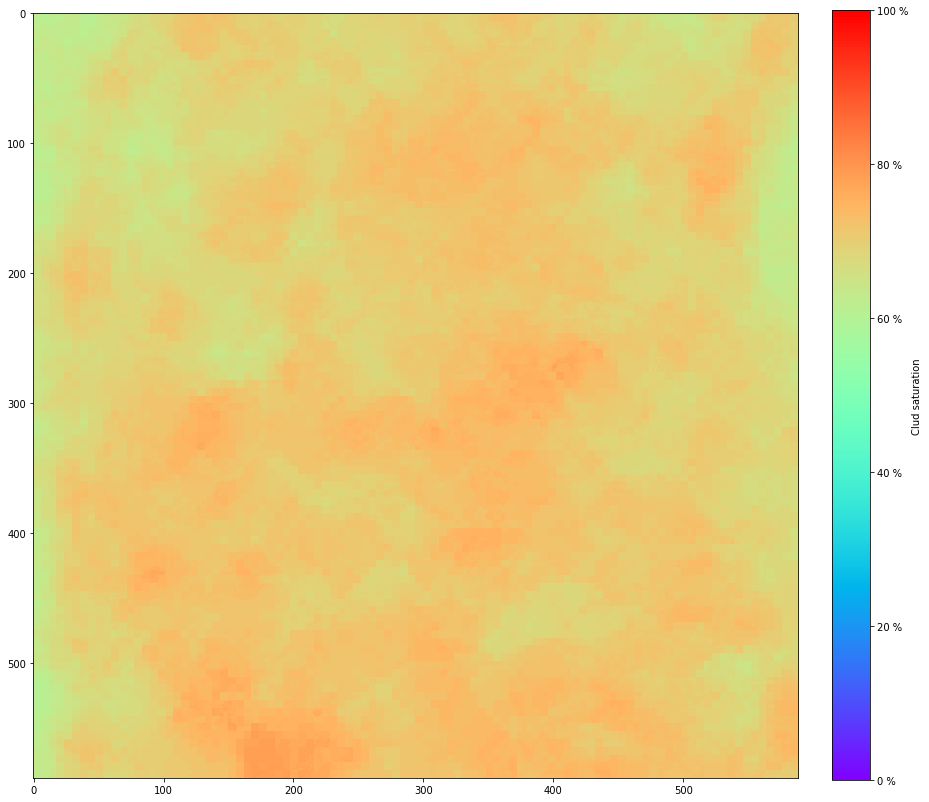

In [7]:
plot_cloud_mask(mask, cmap="rainbow", plot_cmap=True, cmap_frac=0.046)

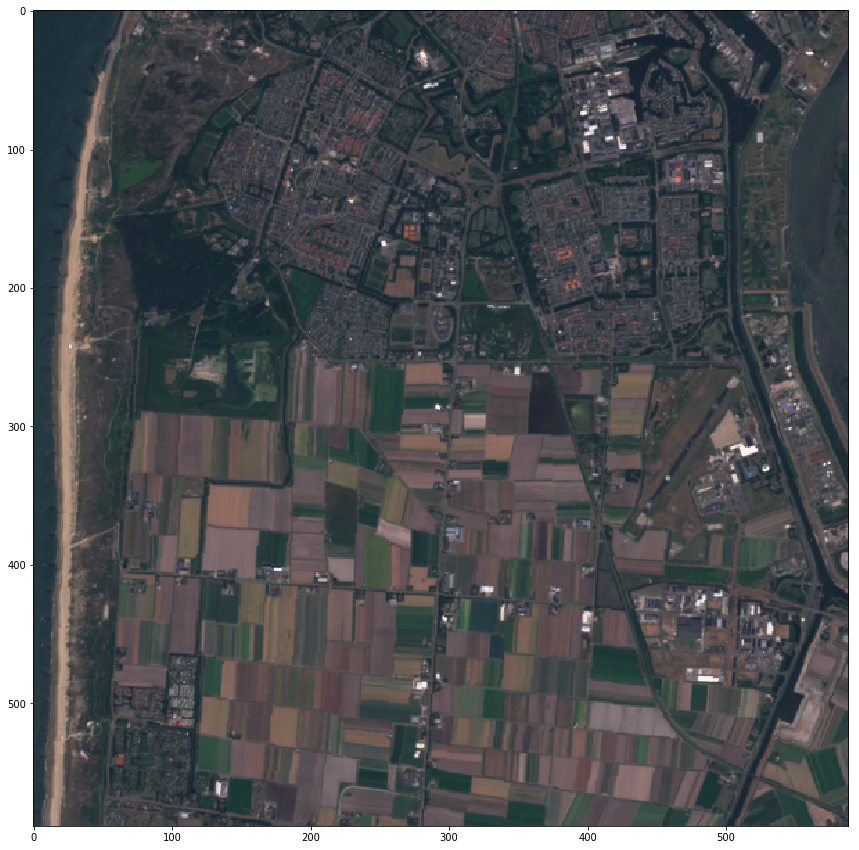

In [13]:
overlay_cloud_mask(true_c[-5])

In [26]:
from skimage.feature import hog
from skimage import data
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [35]:
#dd = skimage.feature.hog(true_c[-5])
d = hog(true_c[-5], visualise=True)

/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


ValueError: The parameter `image` must be a 2-dimensional array

In [36]:
hog.__code__.co_varnames

('image',
 'orientations',
 'pixels_per_cell',
 'cells_per_block',
 'block_norm',
 'visualise',
 'transform_sqrt',
 'feature_vector',
 'normalise',
 'gy',
 'gx',
 'sy',
 'sx',
 'cx',
 'cy',
 'bx',
 'by',
 'n_cellsx',
 'n_cellsy',
 'orientation_histogram',
 'hog_image',
 'draw',
 'radius',
 'orientations_arr',
 'dx_arr',
 'dy_arr',
 'x',
 'y',
 'o',
 'dx',
 'dy',
 'centre',
 'rr',
 'cc',
 'n_blocksx',
 'n_blocksy',
 'normalized_blocks',
 'block')

In [37]:
import skimage
print(help(skimage))

Help on package skimage:

NAME
    skimage - Image Processing SciKit (Toolbox for SciPy)

DESCRIPTION
    ``scikit-image`` (a.k.a. ``skimage``) is a collection of algorithms for image
    processing and computer vision.
    
    The main package of ``skimage`` only provides a few utilities for converting
    between image data types; for most features, you need to import one of the
    following subpackages:
    
    Subpackages
    -----------
    color
        Color space conversion.
    data
        Test images and example data.
    draw
        Drawing primitives (lines, text, etc.) that operate on NumPy arrays.
    exposure
        Image intensity adjustment, e.g., histogram equalization, etc.
    feature
        Feature detection and extraction, e.g., texture analysis corners, etc.
    filters
        Sharpening, edge finding, rank filters, thresholding, etc.
    graph
        Graph-theoretic operations, e.g., shortest paths.
    io
        Reading, saving, and displaying images 

In [9]:
# Collect sample indices (for the same area)
grayscale = netherlands_cloud.get_full_index_timeseries("MOISTURE-GRAYSCALE2")
ndvi = netherlands_cloud.get_full_index_timeseries("NDVI-GREEN-GRAYSCALE")

In [206]:
# Layers from geopedia that currently work (Also see CloudSaturation.py)
# layers = {'tulip_field_2016':'ttl1904', 'tulip_field_2017':'ttl1905', 'arable_land_2017':'ttl1917'}

# Get dataseries for same region (to reuse cloud data)
field, mask_t, nonzero = cloud_sat.get_tulip_mask("tulip_field_2016")
field_full, mask_full_t, nonzero_full = netherlands_cloud.get_tulip_mask("tulip_field_2016")
# Nonzero contains nonzero indices (tulips ARE on such index), see later code for correst indexing

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=589&width=589&srs=EPSG:3857&bbox=524358.0140363087,6964349.630376049,534141.9536568124,6974133.5699965535
Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1180&width=1180&srs=EPSG:3857&bbox=521505.8046283378,6950880.890877021,541073.6838693421,6970448.770118027


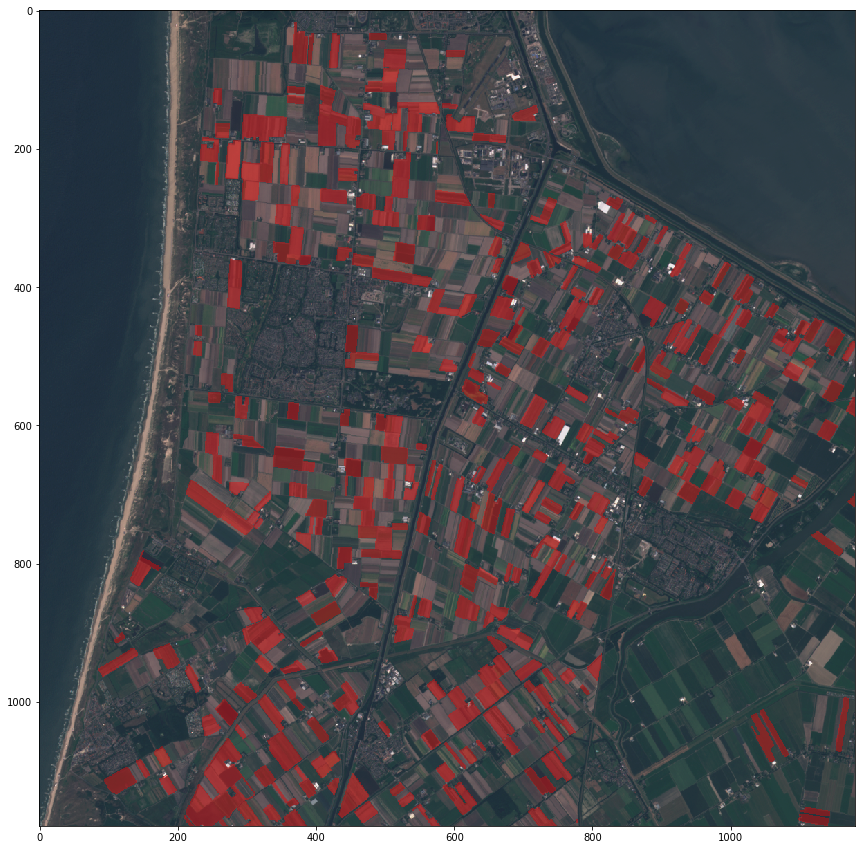

In [203]:
# If mask_maps is not None, for every image in images, each is overlayed with different color
overlay_cloud_mask(true_c_full[0], [mask_full_t], mask_maps = [[255, 0, 0]])

In [116]:
from sklearn.model_selection import train_test_split

In [213]:
def split_train_test_cv(data, train_p=0.5, cv_p=0.5, shuffle=None, state=None):
    if shuffle is 0:
        print("Probably not what you want")
    train, test = train_test_split(data, train_size=train_p, shuffle=shuffle, random_state=state)
    cv, test = train_test_split(test, train_size=cv_p, shuffle=shuffle, random_state=state)
    return train, cv, test

/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


84221
42110
42111


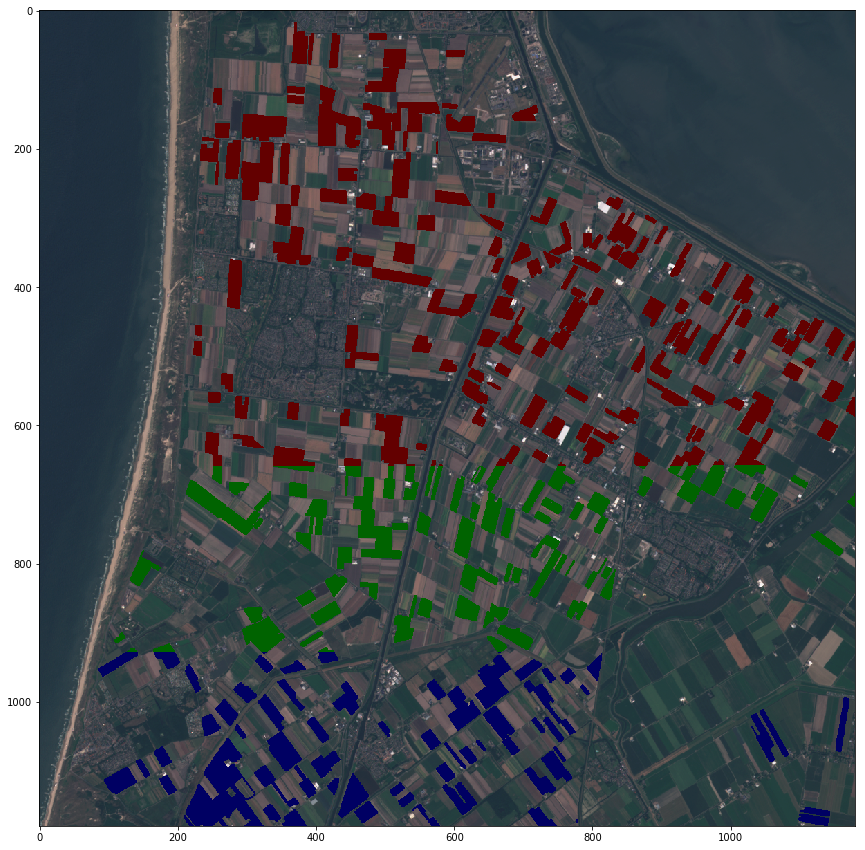

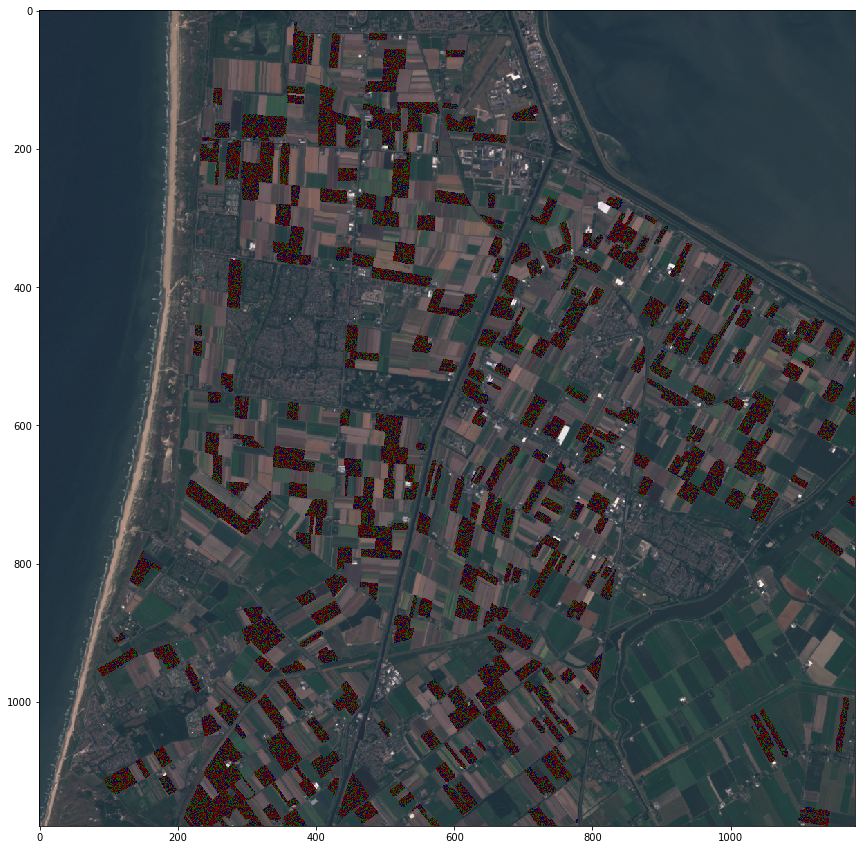

In [ ]:
train, cv, test = split_train_test_cv(nonzero_full, shuffle=False)
overlay_cloud_mask(true_c_full[0], [train, cv, test], mask_maps = [[255, 0, 0, 100], [0,255,0], [0,0,255]])
train, cv, test = split_train_test_cv(nonzero_full, shuffle=1)
overlay_cloud_mask(true_c_full[0], [train, cv, test], mask_maps = [[255, 0, 0, 100], [0,255,0], [0,0,255]])
print(len(train))
print(len(cv))
print(len(test))

In [244]:
y,x = nonzero_full[0]
print(y,x)
print(bands.shape)
print(true_c.shape)

17 370
(117, 98, 98, 13)
(117, 589, 589, 3)


In [250]:
y,x = nonzero_full[0]
print(y,x)
print(bands.shape)
print(true_c.shape)
bands[:,x,y,:].shape

17 370
(117, 589, 589, 13)
(117, 589, 589, 3)


(117, 13)

In [251]:
# Collect sample indices (for the same area)
grayscale = cloud_sat.get_full_index_timeseries("MOISTURE-GRAYSCALE2")
ndvi = cloud_sat.get_full_index_timeseries("NDVI-GREEN-GRAYSCALE")

In [ ]:
x_ind, y_ind = nonzero_full[245]
plot_timeseries(grayscale[:,x_ind,y_ind])
plot_timeseries(ndvi[:,x_ind,y_ind], cmap="rainbow")
# Filter with cloud data
cf=cloud_sat.get_cloud_filter(x_ind,y_ind)
vis =cloud_sat.get_visible_filter(x_ind,y_ind)
#ka = np.zeros(grayscale[:,x_ind,y_ind].shape)
#ka[cf] = 1
# White are clouds
#plot_timeseries(ka, cmap="gray")
#print(len(cf[0])/len(ndvi))
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates)
plot_timeseries_line(ndvi[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plt.savefig("ndvi-" + str(x_ind) + "-" + str(y) + ".png", bbox_inches='tight', pad_inches=0)

In [ ]:
x_ind, y_ind = nonzero_full[245]
plot_timeseries(grayscale[:,x_ind,y_ind])
plot_timeseries(ndvi[:,x_ind,y_ind], cmap="rainbow")
# Filter with cloud data
cf=cloud_sat.get_cloud_filter(x_ind,y_ind)
vis =cloud_sat.get_visible_filter(x_ind,y_ind)
#ka = np.zeros(grayscale[:,x_ind,y_ind].shape)
#ka[cf] = 1
# White are clouds
#plot_timeseries(ka, cmap="gray")
#print(len(cf[0])/len(ndvi))
plot_timeseries_line(ndvi[:, x_ind, y_ind], vis, spec="go", datesp=dates)
plot_timeseries_line(ndvi[:, x_ind, y_ind]*0, cf, spec="ro", new=False)
plt.savefig("ndvi-" + str(x_ind) + "-" + str(y) + ".png", bbox_inches='tight', pad_inches=0)